In [2]:
import python_tokenizer
import unified_tokenizer
import pandas as pd 


# read a json file and save it as a pandas dataframe
df = pd.read_json('data/variable_misuse/20200621_Python_variable_misuse_datasets_train.json', lines=True)
tokenizer = python_tokenizer.PythonTokenizer()

In [92]:
df.head()

,function,label,info
0,"\n\ndef __init__(self, parent=None, *args, **k...",Correct,dataset/ETHPy150Open eoyilmaz/anima/anima/ui/m...
1,"\n\ndef __init__(self, parent=None, *args, **k...",Variable misuse,dataset/ETHPy150Open eoyilmaz/anima/anima/ui/m...
2,\n\ndef basicResults(self):\n ' @todo: docs...,Correct,dataset/ETHPy150Open sahana/eden/modules/s3db/...
3,\n\ndef basicResults(self):\n ' @todo: docs...,Variable misuse,dataset/ETHPy150Open sahana/eden/modules/s3db/...
4,"\n\ndef search_services(self, name_or_id=None,...",Correct,dataset/ETHPy150Open openstack-infra/shade/sha...


In [7]:
row = 0
print("function:")
code = df['function'][row]
print(df['function'][row])

function:


def __init__(self, parent=None, *args, **kwargs):
    QtGui.QListWidget.__init__(self, parent, *args, **kwargs)
    self._take_names = []
    self.take_names = []



In [45]:
tokens = tokenizer.tokenize(code)
print("length of tokens:", len(tokens))
token_and_abstract = tokenizer.tokenize_and_abstract(code)
print("length of token_and_abstract:", len(token_and_abstract))

length of tokens: 60


In [50]:
tokens = []
for i in range(len(token_and_abstract)):
    tokens.append(token_and_abstract[i].spelling)

## Use codebert to tokenize the code

In [62]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup, RobertaTokenizer
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [84]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [57]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [58]:
df.shape

(230062, 3)

In [59]:
PRE_TRAINED_MODEL_NAME = 'microsoft/codebert-base'

In [63]:
tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading: 100%|██████████| 899k/899k [00:00<00:00, 2.63MB/s]
Downloading: 100%|██████████| 456k/456k [00:00<00:00, 1.65MB/s]


In [64]:
sample_code = df['function'][0]

In [65]:
tokens = tokenizer.tokenize(sample_code)

In [71]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(len(token_ids))

70


In [72]:
tokenizer.sep_token, tokenizer.sep_token_id

('</s>', 2)

In [73]:
tokenizer.cls_token, tokenizer.cls_token_id

('<s>', 0)

In [74]:
tokenizer.pad_token, tokenizer.pad_token_id

('<pad>', 1)

In [75]:
tokenizer.unk_token, tokenizer.unk_token_id

('<unk>', 3)

In [80]:
encoding = tokenizer.encode_plus(
  sample_code,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  truncation=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [79]:
encoding

{'input_ids': tensor([[    0, 50118, 50118,  9232, 27148, 25153, 30529,  1640, 13367,     6,
          4095,  5214, 29802,     6,  1009, 48204,     6, 13540, 33294, 48204,
          3256, 50118,  1437,  1437,  1437, 46603, 14484,   118,     4,  1864,
         36583,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

We can inverse the tokenization to have a look at the special tokens:

In [82]:
tokens = tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

### Code tokens length

In [83]:
token_lens = []
for code in df.function:
  tokens = tokenizer.encode(code, max_length=512)
  token_lens.append(len(tokens))

Text(0, 0.5, 'Frequency')

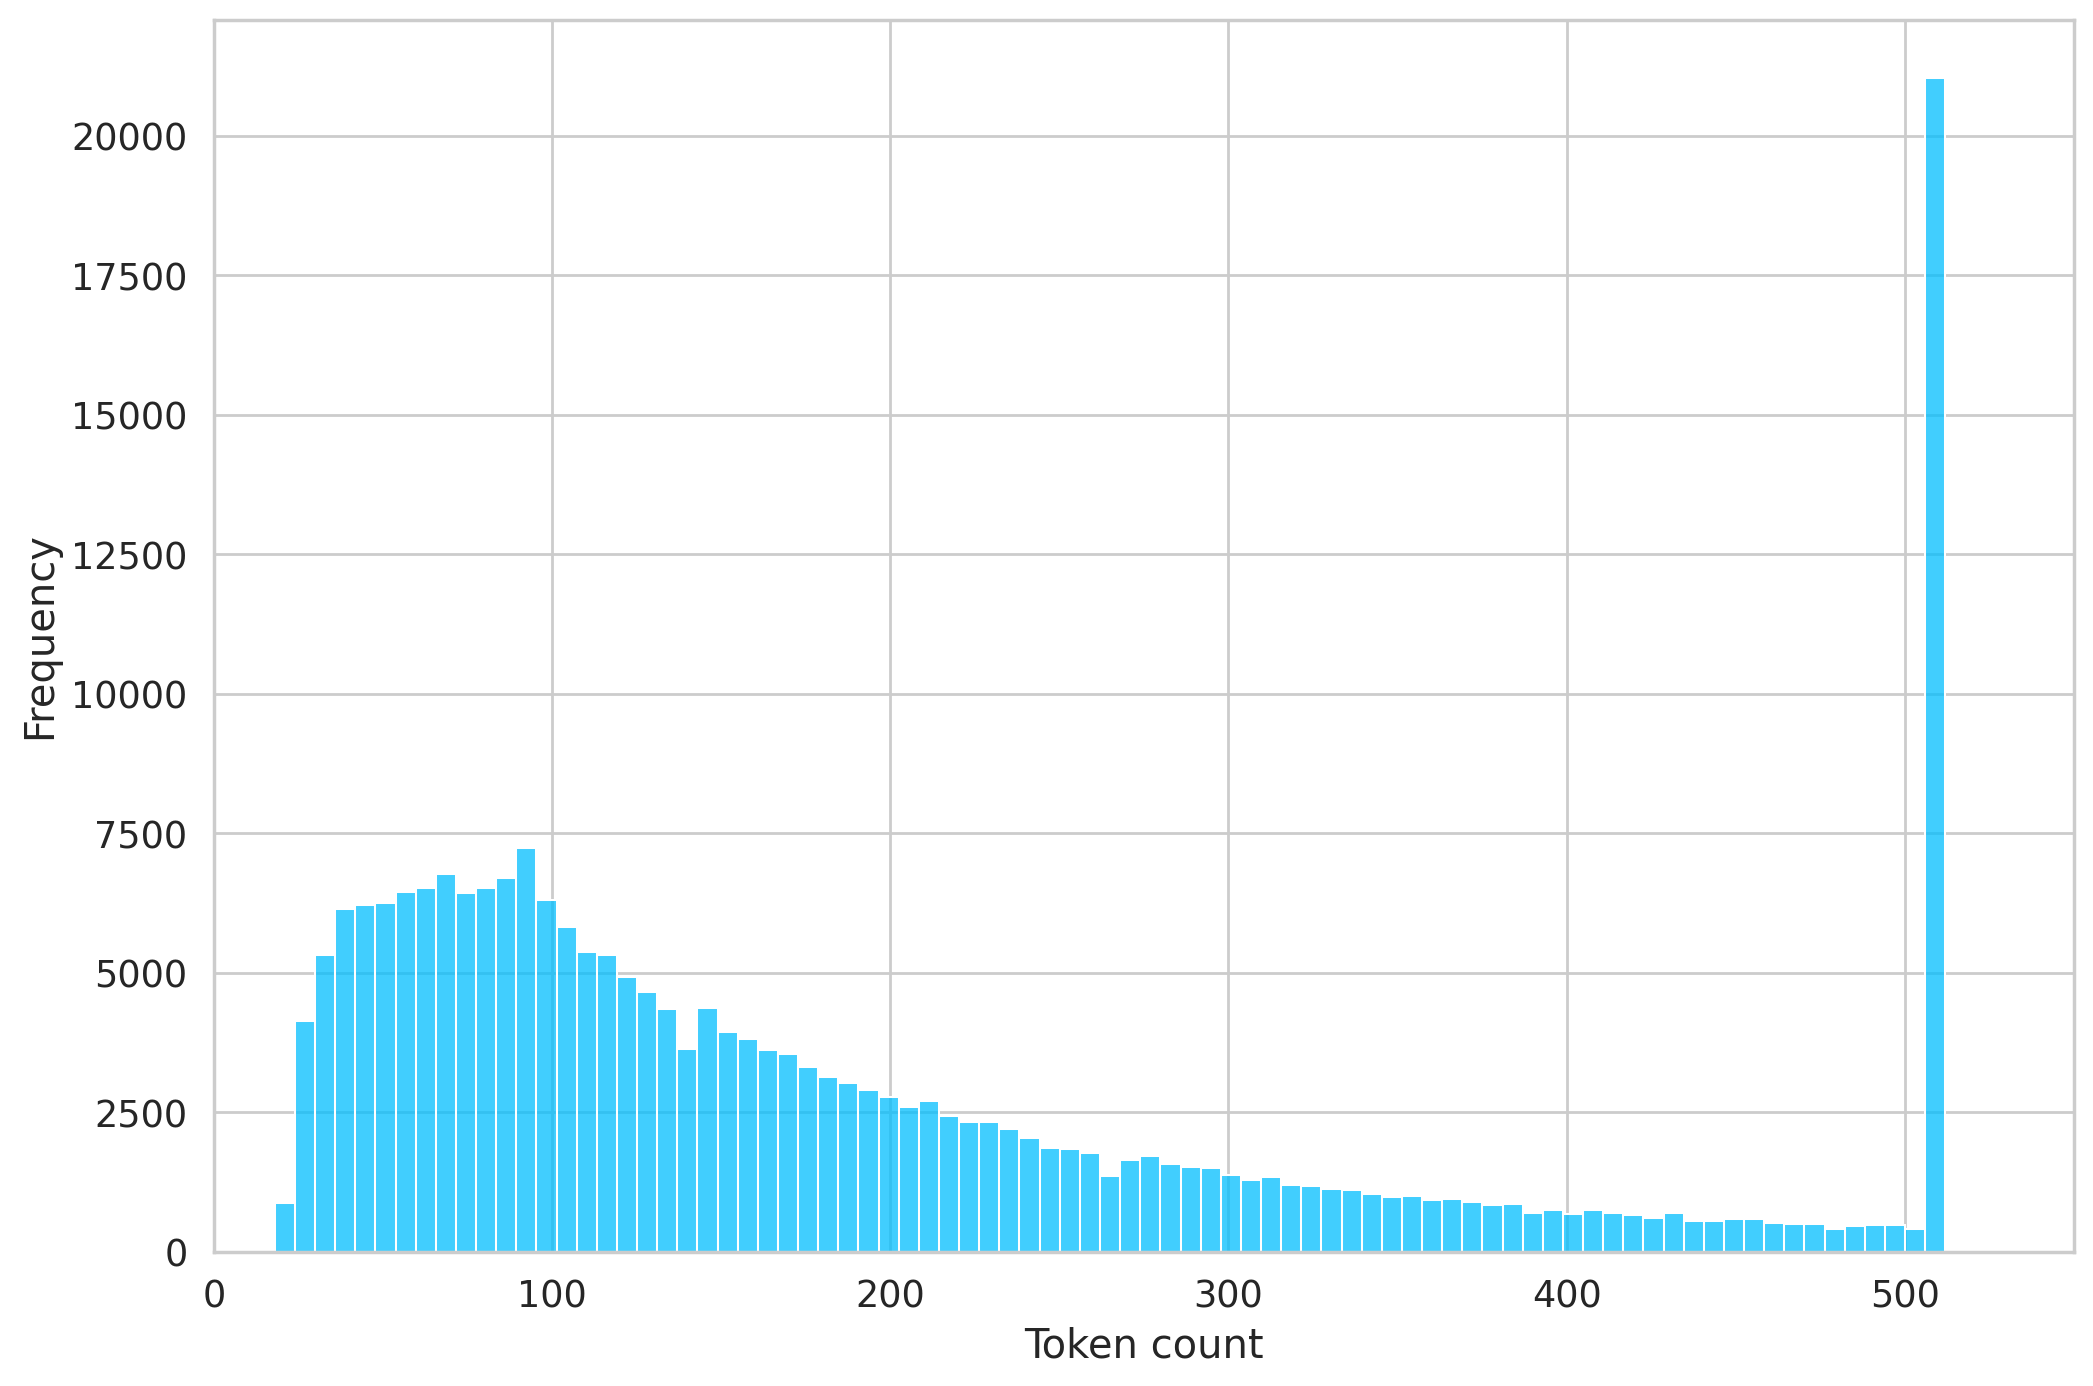

In [91]:
sns.histplot(token_lens)
plt.xlim([0, 550])
plt.xlabel('Token count')
plt.ylabel('Frequency')

In [143]:
from VariableMisuseDataset import VariableMisuseDataset

json_file = '/home/fjiriges/attention_bias/attentionBias/data/variable_misuse/20200621_Python_variable_misuse_datasets_train.json'
df = pd.read_json(json_file, lines=True)

iterable_dataset = VariableMisuseDataset(df)

loader = DataLoader(iterable_dataset, batch_size=8, shuffle=False)

In [144]:
for batch in loader:
    print(batch)
    break

ValueError: Unexpected character found when decoding 'false'

In [146]:
df.head()

,function,label,info
0,"\n\ndef __init__(self, parent=None, *args, **k...",Correct,dataset/ETHPy150Open eoyilmaz/anima/anima/ui/m...
1,"\n\ndef __init__(self, parent=None, *args, **k...",Variable misuse,dataset/ETHPy150Open eoyilmaz/anima/anima/ui/m...
2,\n\ndef basicResults(self):\n ' @todo: docs...,Correct,dataset/ETHPy150Open sahana/eden/modules/s3db/...
3,\n\ndef basicResults(self):\n ' @todo: docs...,Variable misuse,dataset/ETHPy150Open sahana/eden/modules/s3db/...
4,"\n\ndef search_services(self, name_or_id=None,...",Correct,dataset/ETHPy150Open openstack-infra/shade/sha...
